In [1]:
import pandas as pd

# Load CSV files
train = pd.read_csv('../data/train.csv')
features = pd.read_csv('../data/features.csv')
stores = pd.read_csv('../data/stores.csv')

# Check the shape and preview
print(train.shape)
print(features.shape)
print(stores.shape)

train.head()


(421570, 5)
(8190, 12)
(45, 3)


,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [2]:
# Merge train with features on Store, Date, and IsHoliday
merged = pd.merge(train, features, on=['Store', 'Date', 'IsHoliday'], how='left')

# Merge with store metadata
merged = pd.merge(merged, stores, on='Store', how='left')

# Convert 'Date' to datetime
merged['Date'] = pd.to_datetime(merged['Date'])

merged.head()


,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
1,1,1,2010-02-12,46039.49,True,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,A,151315
2,1,1,2010-02-19,41595.55,False,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,A,151315
3,1,1,2010-02-26,19403.54,False,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,A,151315
4,1,1,2010-03-05,21827.90,False,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,A,151315


In [3]:
# Check for missing values
print(merged.isnull().sum())

# Optionally: fill or drop missing values
merged.fillna(0, inplace=True)  # Simple way to handle NAs for now

# Check types
merged.info()


Store                0
Dept                 0
Date                 0
Weekly_Sales         0
IsHoliday            0
Temperature          0
Fuel_Price           0
MarkDown1       270889
MarkDown2       310322
MarkDown3       284479
MarkDown4       286603
MarkDown5       270138
CPI                  0
Unemployment         0
Type                 0
Size                 0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         421570 non-null  int64         
 1   Dept          421570 non-null  int64         
 2   Date          421570 non-null  datetime64[ns]
 3   Weekly_Sales  421570 non-null  float64       
 4   IsHoliday     421570 non-null  bool          
 5   Temperature   421570 non-null  float64       
 6   Fuel_Price    421570 non-null  float64       
 7   MarkDown1     421570 non-null  float64      

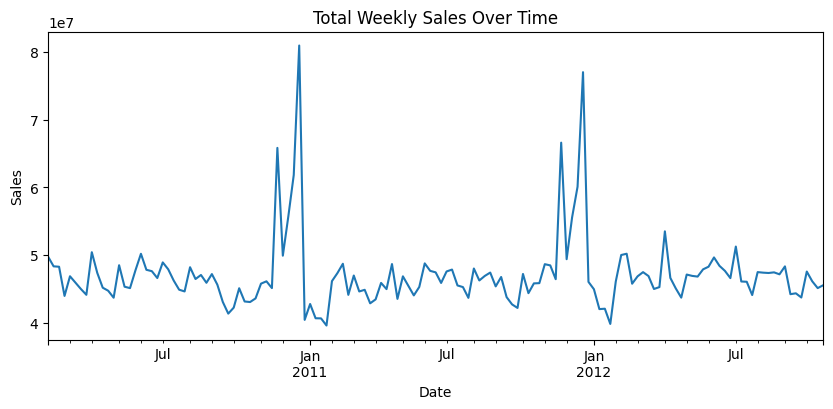

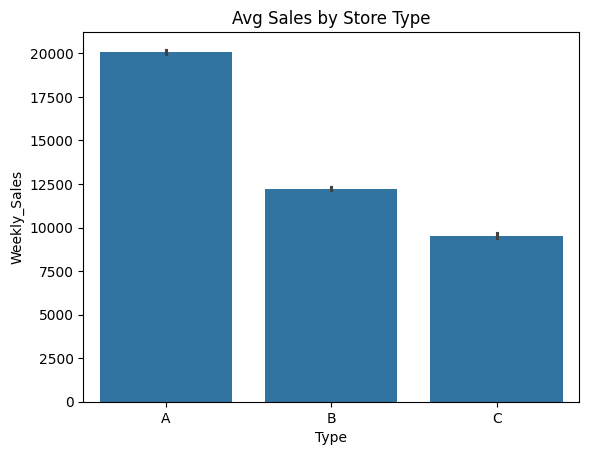

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Total weekly sales over time
weekly_sales = merged.groupby('Date')['Weekly_Sales'].sum()
weekly_sales.plot(figsize=(10,4), title='Total Weekly Sales Over Time')
plt.ylabel('Sales')
plt.show()

# Average sales per store type
sns.barplot(data=merged, x='Type', y='Weekly_Sales')
plt.title('Avg Sales by Store Type')
plt.show()


In [6]:
# Merge train with stores
merged = train.merge(stores, how='left', on='Store')

# Merge with features
merged = merged.merge(features, how='left', on=['Store', 'Date'])


In [7]:
merged['Date'] = pd.to_datetime(merged['Date'])


In [8]:
merged = merged.dropna(subset=['Weekly_Sales'])  # or use fillna if needed


In [9]:
merged.to_csv('merged_cleaned_data.csv', index=False)
print("✅ merged_cleaned_data.csv saved successfully.")


✅ merged_cleaned_data.csv saved successfully.


In [10]:
df = pd.read_csv('merged_cleaned_data.csv')


In [11]:
df = pd.read_csv('merged_cleaned_data.csv')
df['Date'] = pd.to_datetime(df['Date'])

In [12]:
df['year'] = df['Date'].dt.year
df['month'] = df['Date'].dt.month
df['day'] = df['Date'].dt.day
df['dayofweek'] = df['Date'].dt.dayofweek
df['is_weekend'] = df['dayofweek'].apply(lambda x: 1 if x >= 5 else 0)


In [17]:
print(df.columns)

Index(['Store', 'Dept', 'Date', 'Weekly_Sales', 'IsHoliday_x', 'Type', 'Size',
       'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3',
       'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment', 'IsHoliday_y', 'year',
       'month', 'day', 'dayofweek', 'is_weekend'],
      dtype='object')


In [18]:
df = df.rename(columns={'Weekly_Sales': 'sales'})


In [19]:
df = pd.read_csv('merged_cleaned_data.csv')
df['Date'] = pd.to_datetime(df['Date'])

# ✅ Rename column to match feature engineering steps
df = df.rename(columns={'Weekly_Sales': 'sales'})

# ✅ Sort
df = df.sort_values(by=['Store', 'Date'])

# ✅ Apply lag
df['lag_1'] = df.groupby('Store')['sales'].shift(1)
df['lag_7'] = df.groupby('Store')['sales'].shift(7)


In [20]:
# Create lag and rolling features
df['lag_1'] = df.groupby('Store')['sales'].shift(1)
df['lag_7'] = df.groupby('Store')['sales'].shift(7)

df['rolling_avg_7'] = df.groupby('Store')['sales'].transform(lambda x: x.shift(1).rolling(window=7).mean())


In [21]:
df['year'] = df['Date'].dt.year
df['month'] = df['Date'].dt.month
df['day'] = df['Date'].dt.day
df['dayofweek'] = df['Date'].dt.dayofweek
df['is_weekend'] = df['dayofweek'].apply(lambda x: 1 if x >= 5 else 0)


In [22]:
# If not already done
df = pd.get_dummies(df, columns=['Type'], drop_first=True)


In [23]:
# Drop rows with any missing values (lag/rolling will cause some)
df.dropna(inplace=True)

# Drop columns that aren’t useful for modeling
df.drop(['Date', 'IsHoliday'], axis=1, inplace=True, errors='ignore')


In [24]:
df.to_csv('train_ready.csv', index=False)
print("✅ Saved train_ready.csv — feature engineered and ready for modeling.")


✅ Saved train_ready.csv — feature engineered and ready for modeling.


In [25]:
import pandas as pd

df = pd.read_csv('merged_cleaned_data.csv')
df['Date'] = pd.to_datetime(df['Date'])  # Important!

In [26]:
model_data = pd.read_csv('train_ready.csv')
